In [127]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector, array_to_latex, plot_state_qsphere, plot_state_city
import qiskit.quantum_info as qi
from math import sqrt, pi
import numpy as np


1) Circuit to swap two states

Initial State = $\ket{1+}$

Final State = $\frac{1}{\sqrt{2}}( \ket{01} + \ket{11}) = \ket{+1}$

Thus they have been swapped succesfully

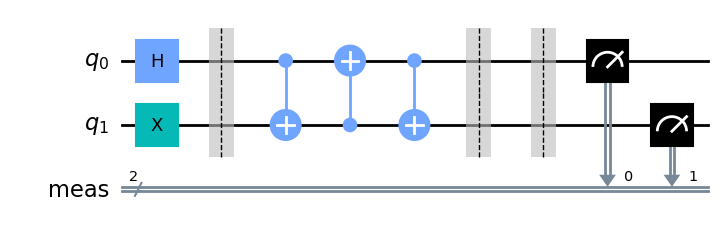

In [128]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
qc.x(1)
qc.barrier()
qc.cx(0,1)
qc.cx(1,0)
qc.cx(0,1)
qc.barrier()
qc.measure_all()
qc.draw('mpl')

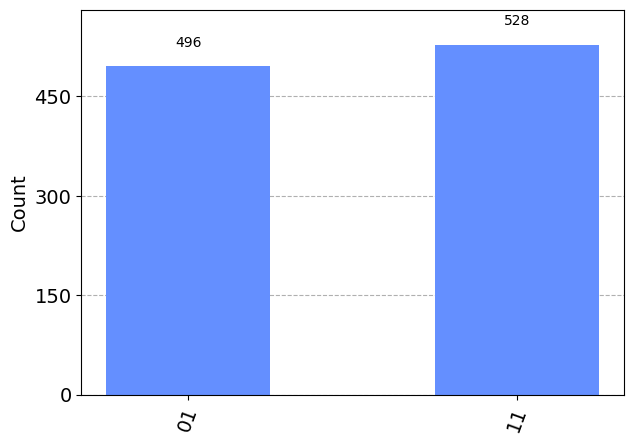

In [129]:
sim = Aer.get_backend('aer_simulator')
results = sim.run(qc).result()
plot_histogram(results.get_counts())

b) Addition modulo 8

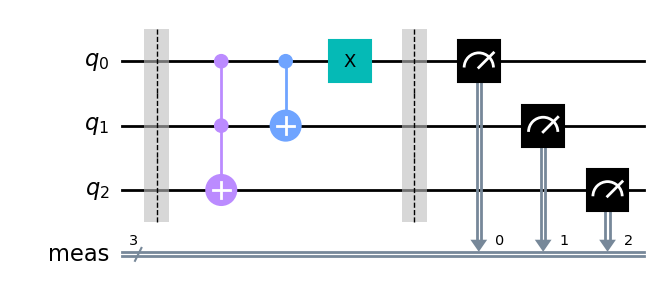

In [130]:
qc = QuantumCircuit(3)
abc = '000'
for i in range(3):
    if abc[i] == '1':
        qc.x(2 - i)
qc.barrier()
qc.ccx(0,1,2)
qc.cx(0,1)
qc.x(0)
qc.measure_all()
qc.draw('mpl')

In [131]:
sim = Aer.get_backend('aer_simulator')
results = sim.run(qc).result()
print(results.get_counts())

{'001': 1024}


c) Adding two digits without ancilla states?

Not sure whether resetting the bits counts or not so..


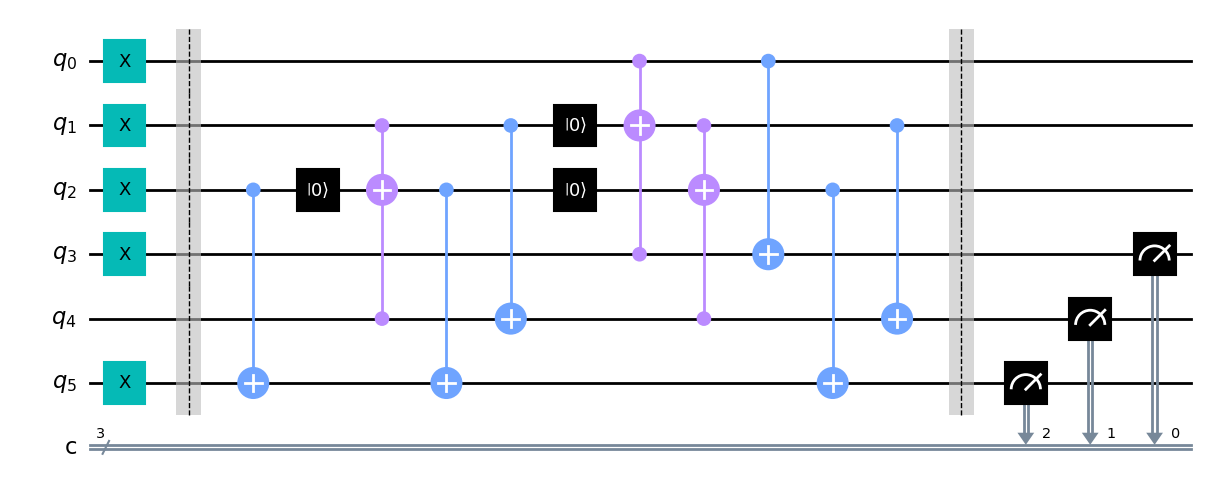

In [132]:
qc = QuantumCircuit(6, 3)
first = '111'   
second = '101' 
for i in range(3):
    if first[i] == '1':
        qc.x(2 - i)

for i in range(3):
    if second[i] == '1':
        qc.x(5 - i)

qc.barrier()

qc.cx(2,5)
qc.reset(2)
qc.ccx(1,4,2)
qc.cx(2,5)

qc.cx(1,4)
qc.reset(1)
qc.ccx(0,3,1)
qc.reset(2)
qc.ccx(1,4,2)

qc.cx(2,5)
qc.cx(1,4)
qc.cx(0,3)

qc.barrier()
qc.measure(5,2)
qc.measure(4,1)
qc.measure(3,0)
qc.draw('mpl')

In [133]:
sim = Aer.get_backend('aer_simulator')
results = sim.run(qc).result()
print(results.get_counts())

{'100': 1024}


d) Hamming weight of n bit number

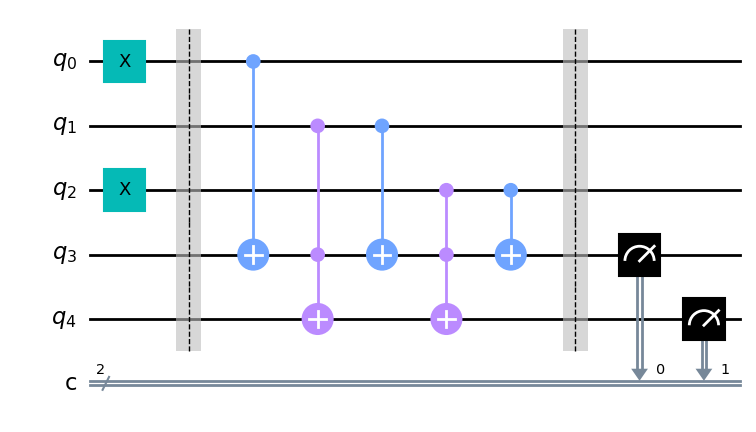

In [134]:
m = '101'
qc = QuantumCircuit(5, 2)
for i in range(3):
    if(m[i] == '1'):
        qc.x(i)

qc.barrier()
qc.cx(0,3)
qc.ccx(1, 3, 4)

qc.cx(1, 3)
qc.ccx(2,3,4)
qc.cx(2, 3)

qc.barrier()

qc.measure(3, 0)
qc.measure(4, 1)
qc.draw('mpl')

In [135]:
sim = Aer.get_backend('aer_simulator')
results = sim.run(qc).result()
print(results.get_counts())

{'10': 1024}
